This notebook examines the accuracy of QU-Fitting results from the MS with a random FG screen. Specifically in the three parameters of interest RM_src, sigma_RM,src, and sigma_RM_fG
This experienment assumes SNR>15

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors
import cmasher as cmr
import math as m
plt.style.use(['default'])

In [2]:
MSRFG_10000_QUfit_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/MSRFG/b1_MSRFG_condensed_sim12_model_num_10000_sims.csv') 
MSRFG_10000_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/MSRFG/band1_turbslab_ran_fg_number_10000_freq_800_1089_SNR_band1.csv') 


MSRFG_10000_true_df.rename( columns={'Unnamed: 0':'src'} , inplace=True ) 
MSRFG_10000_QUfit_df['src'] = MSRFG_10000_QUfit_df['src'] - 1 
MSRFG_merge = pd.merge(MSRFG_10000_QUfit_df , MSRFG_10000_true_df , on='src' , how='outer')  

print(MSRFG_merge.keys())
print(len(MSRFG_10000_QUfit_df))


Index(['Unnamed: 0', 'src', 'fracPol', 'psi0_deg_x', 'deltaRM_radm2',
       'sigmaRM_radm2', 'sigmaRM_radm2_FG', 'RM_screen', 'fracPol_plus_err',
       'psi0_deg_plus_err', 'deltaRM_radm2_plus_err', 'sigmaRM_radm2_plus_err',
       'sigmaRM_radm2_FG_plus_err', 'RM_screen_plus_err', 'fracPol_minus_err',
       'psi0_deg_minus_err', 'deltaRM_radm2_minus_err',
       'sigmaRM_radm2_minus_err', 'sigmaRM_radm2_FG_minus_err',
       'RM_screen_minus_err', 'fracPol_bounds', 'psi0_deg_bounds',
       'deltaRM_radm2_bounds', 'sigmaRM_radm2_bounds',
       'sigmaRM_radm2_FG_bounds', 'RM_screen_bounds', 'chiSq', 'chiSqRed',
       'AIC', 'AICc', 'BIC', 'ln(EVIDENCE) ', 'dLn(EVIDENCE)', 'frac_pol',
       'psi0_deg_y', 'psi0_2_deg', 'RM_screen_radm2', 'RM_screen_2_radm2',
       'RM_src_radm2', 'sigma_RM_2', 'sigmaRM_FG', 'frac_pol_2_comp', 'SNR',
       'model', 'frac_pol_seed', 'RM_screen_seed', 'RM_source_seed',
       'sigmaRM_seed', 'sigma_FG_seed', 'psi0_seed'],
      dtype='object')
7046


# counts

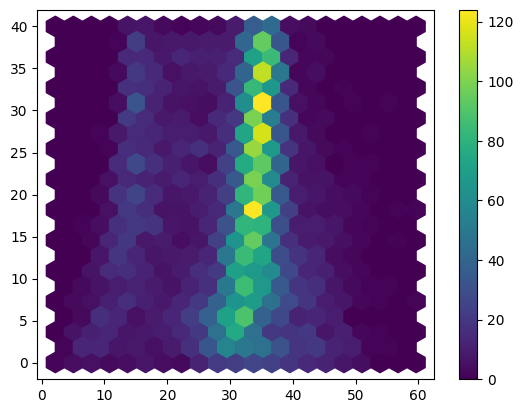

In [3]:
plt.hexbin(MSRFG_merge.deltaRM_radm2, MSRFG_merge.sigmaRM_FG, reduce_C_function=np.sum, gridsize=20)
plt.colorbar()
plt.show()

# SUPER PRELIMINARY LIKE WITH ONLY THE FIRST 5001 SOURCES

Error scaled residuals


 $RM_{src}$ = True - Accuracy

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_74685/3526075586.py:3: SyntaxWarning: invalid escape sequence '\s'
  plt.axvline(x = 1, color = 'b', label = '1$\sigma$')


Text(0.5, 0, '$Residual_{RM_{src}}$/error')

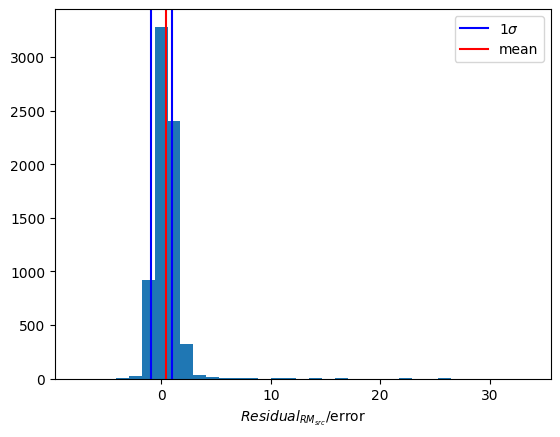

In [4]:
RM_src_residual = (MSRFG_merge.deltaRM_radm2 - MSRFG_merge.RM_src_radm2) / MSRFG_merge.deltaRM_radm2_plus_err
plt.hist(RM_src_residual, bins=35)
plt.axvline(x = 1, color = 'b', label = '1$\sigma$')
plt.axvline(x = -1, color = 'b')
plt.axvline(x=np.mean(RM_src_residual), color = 'r', label='mean')
plt.legend()
plt.xlabel('$Residual_{RM_{src}}$/error')



<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_74685/1288027754.py:3: SyntaxWarning: invalid escape sequence '\s'
  plt.axvline(x = 1, color = 'b', label = '1$\sigma$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_74685/1288027754.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.axvline(x = -1, color = 'b', label = '1$\sigma$')


Text(0.5, 0, '$Residual_{sigma_{src}}$/error')

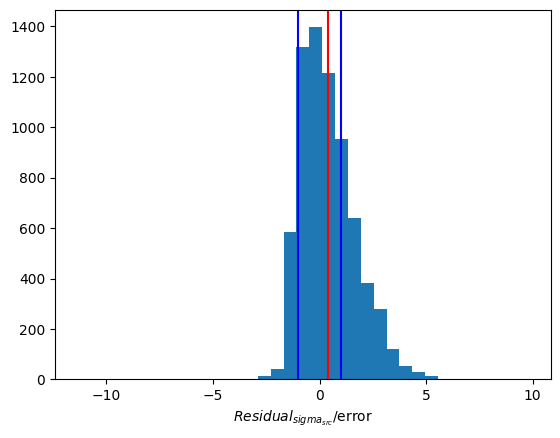

In [5]:
RM_sigma_residual = (MSRFG_merge.sigmaRM_radm2 - MSRFG_merge.sigma_RM_2) / MSRFG_merge.sigmaRM_radm2_plus_err
plt.hist(RM_sigma_residual, bins=35)
plt.axvline(x = 1, color = 'b', label = '1$\sigma$')
plt.axvline(x = -1, color = 'b', label = '1$\sigma$')
plt.axvline(x=np.mean(RM_sigma_residual), color = 'r', label='mean')
plt.xlabel('$Residual_{sigma_{src}}$/error')


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_74685/2253995706.py:3: SyntaxWarning: invalid escape sequence '\s'
  plt.axvline(x = 1, color = 'b', label = '1$\sigma$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_74685/2253995706.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.axvline(x = -1, color = 'b', label = '1$\sigma$')


Text(0.5, 0, '$Residual_{sigma_{FG}}$/error')

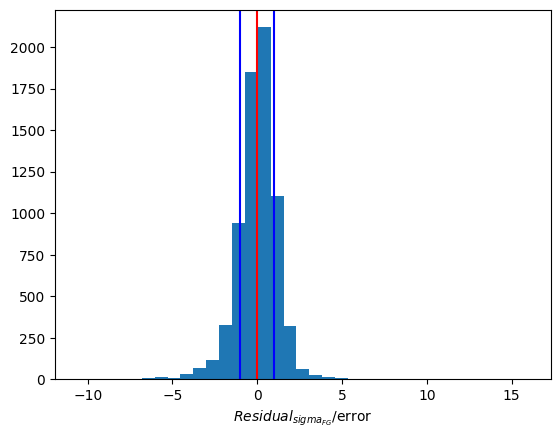

In [6]:
RM_sigmaFG_residual = (MSRFG_merge.sigmaRM_radm2_FG - MSRFG_merge.sigmaRM_FG) / MSRFG_merge.sigmaRM_radm2_FG_plus_err
plt.hist(RM_sigmaFG_residual, bins=35)
plt.axvline(x = 1, color = 'b', label = '1$\sigma$')
plt.axvline(x = -1, color = 'b', label = '1$\sigma$')
plt.axvline(x=np.mean(RM_sigmaFG_residual), color = 'r', label='mean')
plt.xlabel('$Residual_{sigma_{FG}}$/error')


Text(0, 0.5, 'ln(EVD)')

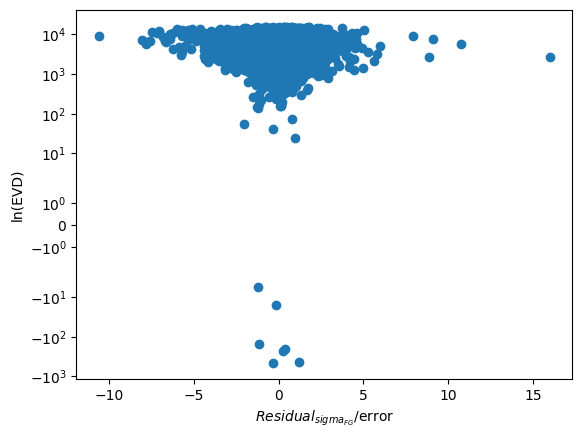

In [7]:
plt.scatter(RM_sigmaFG_residual, MSRFG_merge["ln(EVIDENCE) "])
plt.yscale('symlog')
plt.xlabel('$Residual_{sigma_{FG}}$/error')
plt.ylabel('ln(EVD)')

Text(0, 0.5, 'BIC')

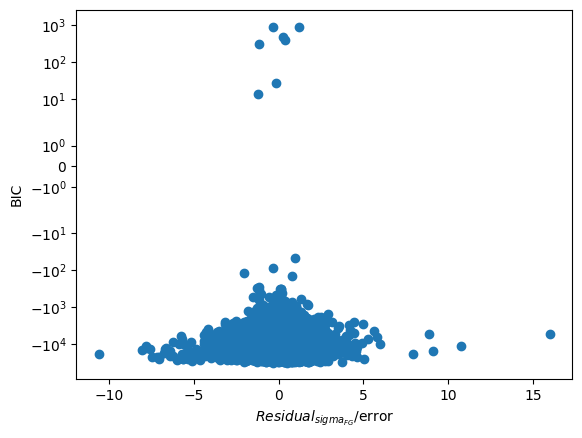

In [8]:
plt.scatter(RM_sigmaFG_residual, MSRFG_merge["BIC"])
plt.yscale('symlog')
plt.xlabel('$Residual_{sigma_{FG}}$/error')
plt.ylabel('BIC')

Text(0, 0.5, 'BIC')

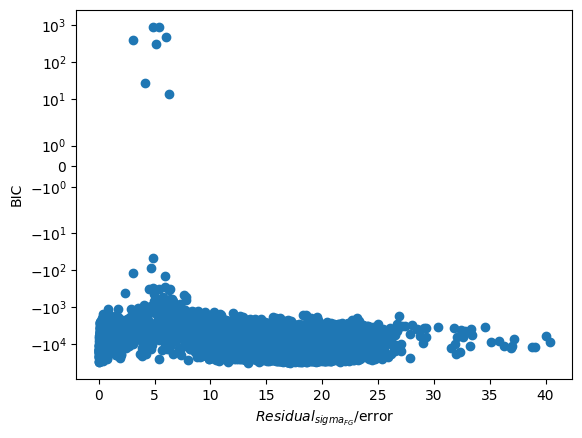

In [9]:
plt.scatter(MSRFG_merge.deltaRM_radm2_plus_err, MSRFG_merge["BIC"])
plt.yscale('symlog')
plt.xlabel('$Residual_{sigma_{FG}}$/error')
plt.ylabel('BIC')

Text(0, 0.5, 'SNR')

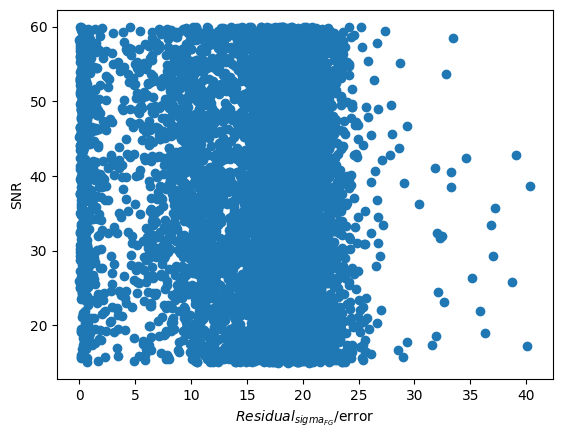

In [10]:
plt.scatter(MSRFG_merge.deltaRM_radm2_plus_err, MSRFG_merge["SNR"])
plt.xlabel('$Residual_{sigma_{FG}}$/error')
plt.ylabel('SNR')

Text(0, 0.5, 'SNR')

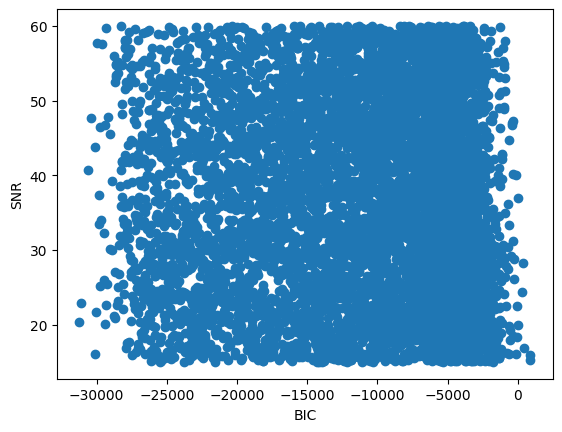

In [11]:
plt.scatter(MSRFG_merge["BIC"], MSRFG_merge["SNR"])

plt.xlabel('BIC')
plt.ylabel('SNR')

 There are confiedent lower SNR sources....

# Want to cut the bad fits from the data first

## Look At SNR

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_74685/4096845910.py:2: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma_{FG}$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_74685/4096845910.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.colorbar(label='Median Residual $\sigma_{FG}$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_74685/4096845910.py:8: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma_{FG}$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_74685/4096845910.py:10: SyntaxWarning: invalid 

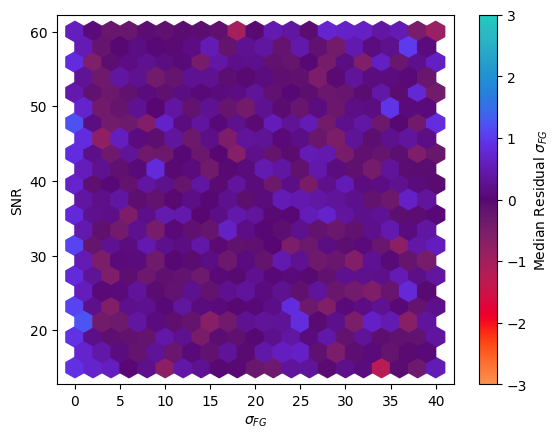

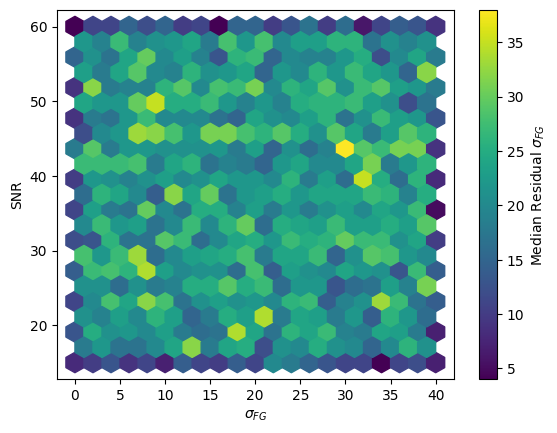

In [12]:
plt.hexbin(MSRFG_merge.sigmaRM_FG, MSRFG_merge.SNR, RM_sigmaFG_residual, reduce_C_function=np.nanmedian, gridsize=20, vmin=-3, vmax=3, cmap='cmr.guppy')
plt.xlabel('$\sigma_{FG}$')
plt.ylabel('SNR')
plt.colorbar(label='Median Residual $\sigma_{FG}$')
plt.show()

plt.hexbin(MSRFG_merge.sigmaRM_FG, MSRFG_merge.SNR, reduce_C_function=np.sum, gridsize=20)
plt.xlabel('$\sigma_{FG}$')
plt.ylabel('SNR')
plt.colorbar(label='Median Residual $\sigma_{FG}$')

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_74685/989644395.py:2: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma_{src}$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_74685/989644395.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.colorbar(label='Median Residual $\sigma_{src}$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_74685/989644395.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma_{FG}$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_74685/989644395.py:9: SyntaxWarning: invalid escap

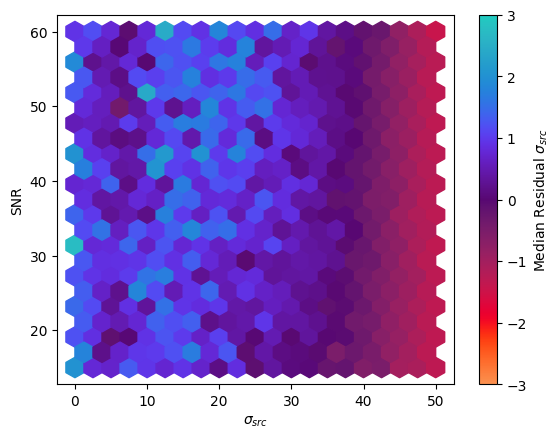

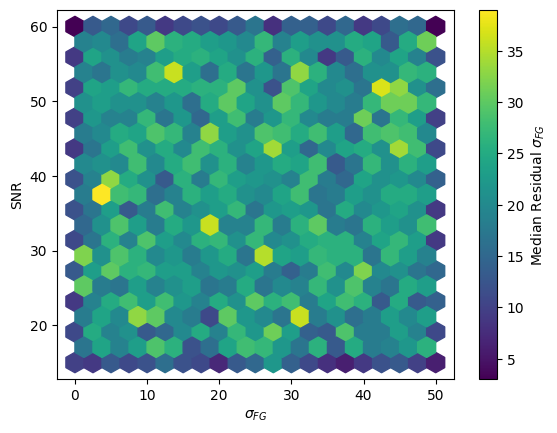

In [13]:
plt.hexbin(MSRFG_merge.sigma_RM_2, MSRFG_merge.SNR, RM_sigma_residual, reduce_C_function=np.nanmedian, vmin=-3, vmax=3, gridsize=20, cmap='cmr.guppy')
plt.xlabel('$\sigma_{src}$')
plt.ylabel('SNR')
plt.colorbar(label='Median Residual $\sigma_{src}$')
plt.show()
plt.hexbin(MSRFG_merge.sigma_RM_2, MSRFG_merge.SNR, reduce_C_function=np.sum, gridsize=20)
plt.xlabel('$\sigma_{FG}$')
plt.ylabel('SNR')
plt.colorbar(label='Median Residual $\sigma_{FG}$')

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_74685/3500876661.py:8: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma_{FG}$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_74685/3500876661.py:10: SyntaxWarning: invalid escape sequence '\s'
  plt.colorbar(label='Median Residual $\sigma_{FG}$')


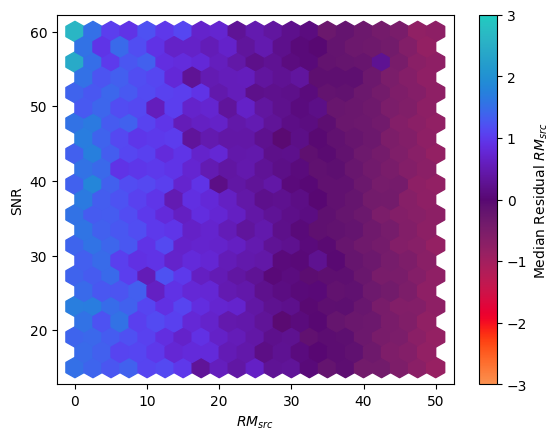

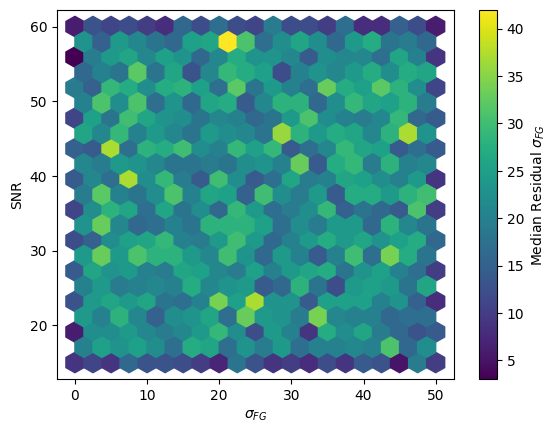

In [14]:
plt.hexbin(MSRFG_merge.RM_src_radm2, MSRFG_merge.SNR, RM_src_residual, reduce_C_function=np.nanmedian, vmin=-3, vmax=3,gridsize=20, cmap='cmr.guppy')
plt.xlabel('$RM_{src}$')
plt.ylabel('SNR')
plt.colorbar(label='Median Residual $RM_{src}$')
plt.show()

plt.hexbin(MSRFG_merge.RM_src_radm2, MSRFG_merge.SNR, reduce_C_function=np.sum, gridsize=20)
plt.xlabel('$\sigma_{FG}$')
plt.ylabel('SNR')
plt.colorbar(label='Median Residual $\sigma_{FG}$')